In [ ]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
def fit_arma(p_max, q_max, data, n):
    best = np.inf
    bestparams = None

    # for 1 < p < pmax and 1 < q < qmax
    for p in range(1, p_max+1):
        for q in range(1, q_max+1):

            # use provided ARMA
            model = ARIMA(data, order=(p, 0, q), trend = 'c').fit(method='innovations_mle')
            pred = model.predict(start=0, end=len(data) + n)
            
            # calc AIC
            AIC = model.aic

            # determine which arma has min AIC
            if AIC < best:
                best = AIC
                bestparams = (p, q)
    return bestparams

In [30]:
all_data = pd.read_csv('Data_Files/price_by_state_cleaned.csv')

In [31]:
def fit_state(state, data, train_data):
    # find best params
    d = np.diff(train_data)
    n = len(train_data)
    p, q = fit_arma(6, 6, d, n)

    # fit model with params
    model = ARIMA(train_data, order=(p, 0, q), trend = 'c').fit(method='innovations_mle')
    pred = model.predict(start=0, end=len(d) + n)

    return pred

In [33]:
state = 'Arizona'
data = all_data[state].values

# data for 2016 on
train_data = data[192:]
test_data = data[:192]
pred = fit_state(state, data, train_data)

/Users/madelyncalder/Desktop/ACME/venv/lib/python3.10/site-packages/statsmodels/tsa/arima/estimators/gls.py:296: UserWarning: Feasible GLS failed to converge in 50 iterations. Consider increasing the maximum number of iterations using the `max_iter` argument or reducing the required tolerance using the `tolerance` argument.
  warnings.warn('Feasible GLS failed to converge in %d iterations.'
/Users/madelyncalder/Desktop/ACME/venv/lib/python3.10/site-packages/statsmodels/tsa/arima/estimators/gls.py:296: UserWarning: Feasible GLS failed to converge in 50 iterations. Consider increasing the maximum number of iterations using the `max_iter` argument or reducing the required tolerance using the `tolerance` argument.
  warnings.warn('Feasible GLS failed to converge in %d iterations.'
/Users/madelyncalder/Desktop/ACME/venv/lib/python3.10/site-packages/statsmodels/tsa/arima/estimators/gls.py:296: UserWarning: Feasible GLS failed to converge in 50 iterations. Consider increasing the maximum numb

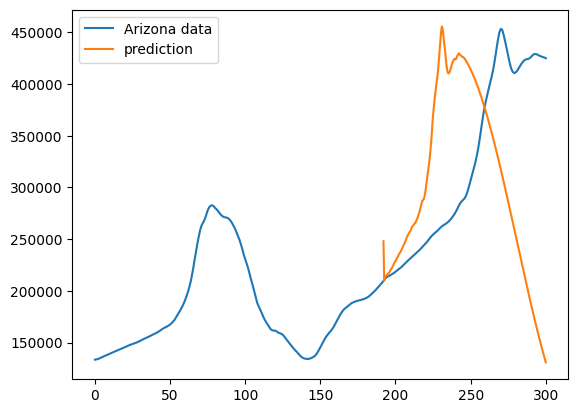

In [34]:
# plot original data
plt.plot(data, label=f'{state} data')

# plot prediction and actual
x = np.linspace(192, 300, len(pred))
plt.plot(x, pred, label='prediction')

plt.legend()
plt.show()